#### Introduction to Statistics: Exploratory Data Analysis

In [33]:
import pandas as pd
import scipy.stats as sta
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
# Mean, Median and Outliers

data = pd.read_csv("state_crime.csv")

data.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [35]:
# Print unique states

states = data["State"].unique()

print("States included in the analysis \n", states)

# Filtering data to only work with the year 2019

new_data = data[(data["Year"]==2019)]

print("Number of rows and number of columnns: ({},{})\n".format(new_data.shape[0], new_data.shape[1]))

States included in the analysis 
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Number of rows and number of columnns: (52,21)



<center>  Computing the mean, trimmed mean, weighted mean and median <center>

In [36]:
print("The mean for rate of Violent Assault is {0:.5}".format(new_data["Data.Rates.Violent.Assault"].mean()))

trim_m = sta.trim_mean(new_data["Data.Rates.Violent.Assault"],0.10) 
print("The trimmed mean of Rates of Violent Assault is {0:.5}".format(trim_m))

weighted_mean = np.average(new_data["Data.Rates.Violent.Assault"],weights=new_data["Data.Population"])
print("The weighted mean of Rates of Violent Assault is {0:.5}".format(weighted_mean))

median_rva = new_data["Data.Rates.Violent.Assault"].median()
print("The median of Rates of Violent Assault is {0:.5}".format(median_rva))

The mean for rate of Violent Assault is 257.07
The trimmed mean of Rates of Violent Assault is 241.04
The weighted mean of Rates of Violent Assault is 250.19
The median of Rates of Violent Assault is 247.7


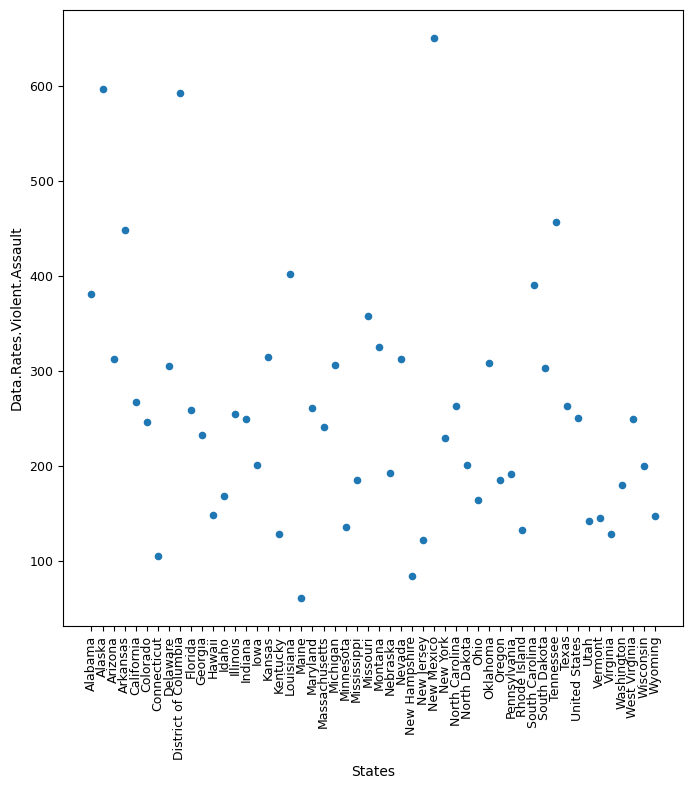

In [37]:
# Visualizing the data

new_data.plot(x="State", y="Data.Rates.Violent.Assault", kind='scatter', figsize=(8,8), rot=90, xlabel="States", fontsize=9)
plt.savefig('scatter_plot', dpi=100)

<center> Computing measure of variation <center>

In [39]:
# Computing the std and variance
from cmath import sqrt

std = new_data["Data.Rates.Violent.Assault"].std()

print("The std of rate of violent assault out of the 52 states is {0:.5}\n".format(std))

print("The variance of rate of violent assault out of the 52 states is {0:.5}\n".format(math.sqrt(std)))



The std of rate of violent assault out of the 52 states is 126.93

The variance of rate of violent assault out of the 52 states is 11.266



In [40]:
# Understanding the position of our samples using percentiles.

IQR = new_data["Data.Rates.Violent.Assault"].quantile(0.75)-new_data["Data.Rates.Violent.Assault"].quantile(0.25)

print("The IQR of Data Rates Violent Assault is {0:.5}\n".format(IQR))

The IQR of Data Rates Violent Assault is 142.0



<center> Exploring the Data Distribution <center>

In [41]:
# Computing and printing quantiles

new_data["Data.Rates.Violent.Assault"].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    114.46
0.25    166.90
0.50    247.70
0.75    308.90
0.95    517.63
Name: Data.Rates.Violent.Assault, dtype: float64

<center> Visualizing Data Distribution Boxplot <center>

Text(0, 0.5, 'Data Rate Violent Assault')

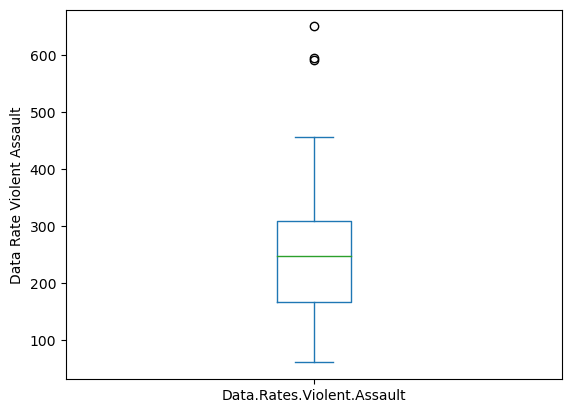

In [42]:
ax = (new_data[["Data.Rates.Violent.Assault"]].plot.box())
ax.set_ylabel("Data Rate Violent Assault")

<center> Visualizing Data Distribution <center>
<center> Frequency Table anf and Histogram <center>

In [44]:
binnedAssault = pd.cut(new_data["Data.Rates.Violent.Assault"],10)
result = binnedAssault.value_counts().to_frame()
result.head(10)

,Data.Rates.Violent.Assault
"(120.22, 179.14]",11
"(238.06, 296.98]",11
"(179.14, 238.06]",10
"(296.98, 355.9]",8
"(355.9, 414.82]",4
"(60.711, 120.22]",3
"(591.58, 650.5]",3
"(414.82, 473.74]",2
"(473.74, 532.66]",0
"(532.66, 591.58]",0


385.36


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

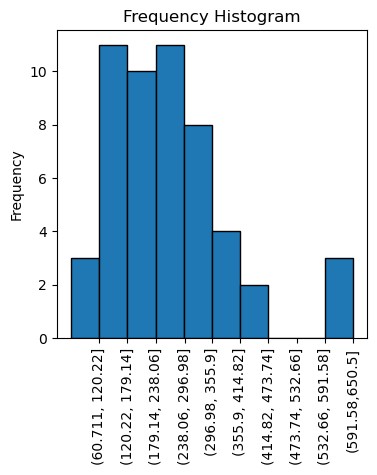

In [45]:

print(binnedAssault.iloc[0].mid)
xticks_label = ['(60.711, 120.22]','(120.22, 179.14]','(179.14, 238.06]','(238.06, 296.98]','(296.98, 355.9]','(355.9, 414.82]','(414.82, 473.74]',
'(473.74, 532.66]','(532.66, 591.58]','(591.58,650.5]']
xticks = [120.22, 179.14, 238.06, 298.98, 355.9, 414.82, 473.74, 532.66, 591.58, 650.5]

fig = new_data["Data.Rates.Violent.Assault"].plot.hist(figsize=(4,4), rot=90, edgecolor='black')
fig.set_xticks(ticks=xticks)
fig.set_xticklabels(xticks_label)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

Text(0.5, 0, 'Data Rates Violent Assault')

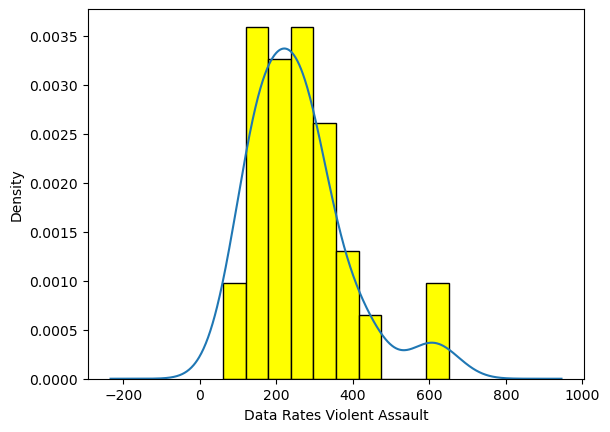

In [46]:
ax = new_data["Data.Rates.Violent.Assault"].plot.hist(density=True, color='yellow', edgecolor='black')
new_data["Data.Rates.Violent.Assault"].plot.density(ax=ax)
ax.set_xlabel("Data Rates Violent Assault")

C:\Users\janei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Data.Rates.Violent.Assault', ylabel='Density'>

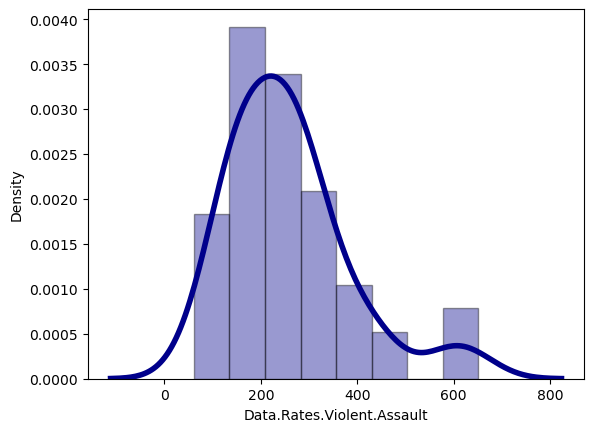

In [48]:
import seaborn as sns

sns.distplot(new_data["Data.Rates.Violent.Assault"], hist=True, kde=True, color='darkblue', 
hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

C:\Users\janei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Data.Rates.Violent.Assault', ylabel='Density'>

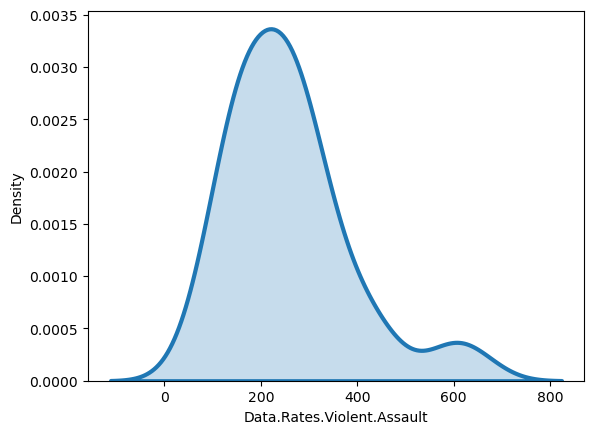

In [49]:
sns.distplot(new_data["Data.Rates.Violent.Assault"], hist=False, kde_kws={'shade':True, 'linewidth':3})